# Treinamento com interface de alto nível

O objetivo deste notebook é treinar uma rede usando a metodologia de treinamento de alto nível.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms

from lib.fit_module import FitModule

## Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos 500 amostras de treinamento e 100 amostras de validação.

In [2]:
dataset_dir = '/data/datasets/MNIST/'

data_transform = torchvision.transforms.ToTensor()

# carrega o conjunto de treinamento e de teste
train_dataset = torchvision.datasets.MNIST(dataset_dir, train=True,  transform=data_transform)
test_dataset  = torchvision.datasets.MNIST(dataset_dir, train=False, transform=data_transform)

print("Tamanho do dataset de treino:", len(train_dataset))
print("Tamanho do dataset de teste: ", len(test_dataset))

print("\nDimensões dos dados das imagens:",    train_dataset[0][0].size())
print("Tipo dos dados das imagens:     ", type(train_dataset[0][0]))
print("Tipo das classes das imagens:   ", type(train_dataset[0][1]))

Tamanho do dataset de treino: 60000
Tamanho do dataset de teste:  10000

Dimensões dos dados das imagens: torch.Size([1, 28, 28])
Tipo dos dados das imagens:      <class 'torch.FloatTensor'>
Tipo das classes das imagens:    <class 'int'>


In [4]:
n_samples_train = 1000
n_samples_test  = 500

x_train = train_dataset.train_data[:n_samples_train]
y_train = train_dataset.train_labels[:n_samples_train]
x_test  = test_dataset.test_data[:n_samples_test]
y_test  = test_dataset.test_labels[:n_samples_test]

print('Amostras para treinamento:', len(train_dataset))
print('Amostras para validação:',   len(test_dataset))

Amostras para treinamento: 60000
Amostras para validação: 10000


In [5]:
x_train = x_train.float()
x_test = x_test.float()

x_train = x_train / 255.
x_test = x_test / 255.


In [6]:
print(x_train.type(), x_train.size())
print(y_train.type(), y_train.size())

torch.FloatTensor torch.Size([1000, 28, 28])
torch.LongTensor torch.Size([1000])


## Visualizando os dados

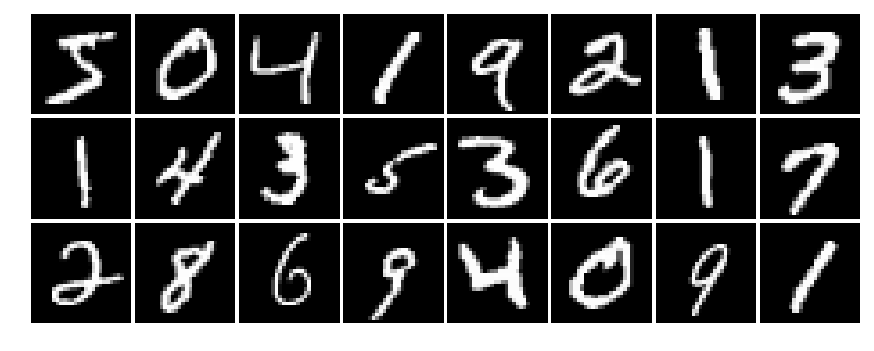

In [7]:
N = 24
#temp_dataloader = torch.utils.data.DataLoader(train_dataset, 
#                                              batch_size=N,
#                                              shuffle=True)
#image_batch, labels = next(iter(temp_dataloader))
grid = torchvision.utils.make_grid(x_train[:N].unsqueeze(1), normalize=True, pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()

## Criação da rede

In [8]:
# Define your model EXACTLY as if you were using nn.Module
class Network(FitModule):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
model = Network()
model

Network (
  (fc1): Linear (784 -> 50)
  (fc2): Linear (50 -> 10)
)

## Treinamento

In [9]:
def accuracy(y_true, y_pred):
    return np.mean(y_true.numpy() == np.argmax(y_pred.numpy(), axis=1))

In [10]:
model.fit(x_train, y_train, epochs=10, metrics=[accuracy])

Epoch 1 / 10
[========================================>] %	100loss: 2.2862    accuracy: 0.2230
Epoch 2 / 10
[========================================>] %	100loss: 2.2288    accuracy: 0.3330
Epoch 3 / 10
[========================================>] %	100loss: 2.1715    accuracy: 0.4230
Epoch 4 / 10
[========================================>] %	100loss: 2.1065    accuracy: 0.5050
Epoch 5 / 10
[========================================>] %	100loss: 2.0261    accuracy: 0.5820
Epoch 6 / 10
[========================================>] %	100loss: 1.9440    accuracy: 0.6260
Epoch 7 / 10
[========================================>] %	100loss: 1.8521    accuracy: 0.6620
Epoch 8 / 10
[========================================>] %	100loss: 1.7547    accuracy: 0.6800
Epoch 9 / 10
[========================================>] %	100loss: 1.6497    accuracy: 0.7250
Epoch 10 / 10
[========================================>] %	100loss: 1.5483    accuracy: 0.7480


[OrderedDict([('loss', 2.286196507513523), ('accuracy', 0.223)]),
 OrderedDict([('loss', 2.2288196459412575),
              ('accuracy', 0.33300000000000002)]),
 OrderedDict([('loss', 2.1714869290590286),
              ('accuracy', 0.42299999999999999)]),
 OrderedDict([('loss', 2.106530413031578), ('accuracy', 0.505)]),
 OrderedDict([('loss', 2.0260859057307243),
              ('accuracy', 0.58199999999999996)]),
 OrderedDict([('loss', 1.9440307319164276), ('accuracy', 0.626)]),
 OrderedDict([('loss', 1.8521033227443695),
              ('accuracy', 0.66200000000000003)]),
 OrderedDict([('loss', 1.7546878010034561),
              ('accuracy', 0.68000000000000005)]),
 OrderedDict([('loss', 1.649702064692974), ('accuracy', 0.72499999999999998)]),
 OrderedDict([('loss', 1.5482925437390804), ('accuracy', 0.748)])]

## Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de validação

In [11]:
print('Training Accuracy:   {}%'.format(trainer.evaluate_loader(train_loader)['val_acc_metric']))
print('Validation Accuracy: {}%'.format(trainer.evaluate_loader(val_loader)['val_acc_metric']))

NameError: name 'trainer' is not defined

## Matriz de confusão com dados de treinamento e validação

In [ ]:
for title, ds in zip (['treinamento', 'validação'], [train_dataset, val_dataset]):
    _, pred = torch.max(F.softmax(trainer.predict(ds.inputs[0])), dim=1)
    pred = pred.data.numpy()
    targ = ds.targets[0].numpy()

    print('Matriz de confusão ({}): '.format(title))
    display(pd.crosstab(pred, targ))

# Broken tools:

In [ ]:
# trainer history functionality removed
print(trainer.history)

In [ ]:
# predict_loader broken
trainer.predict_loader(train_loader)